<a href="https://colab.research.google.com/github/Swamy612/Supervised-Learning/blob/main/NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Datasource - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Dataset - https://drive.google.com/file/d/1XDKF0QAGRb_GAvuQEPLBQawOiWcRuiDK/view?usp=drive_link

In [ ]:
# Import required libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# nlp - natural language processing
import nltk    # natural language tool-kit
from nltk.corpus import stopwords
nltk.download('stopwords')

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/sms_spam.csv')
data.shape

(5574, 2)

In [ ]:
# data sample
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


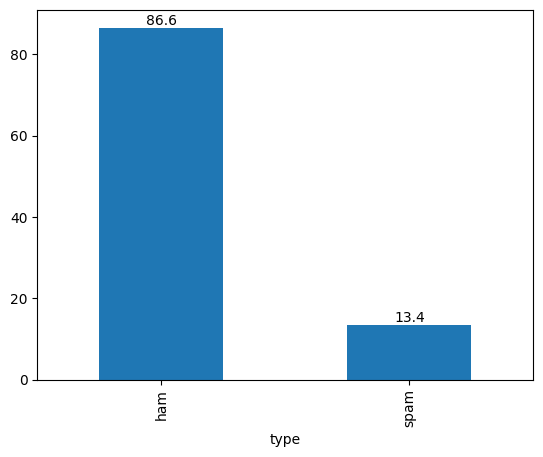

In [ ]:
# analyse the target column
ax=round(data['type'].value_counts(normalize=True)*100, 2).plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [ ]:
# length column to understand the independent column
data['text_len'] = data['text'].apply(len)

# data sample
data.head()

,type,text,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


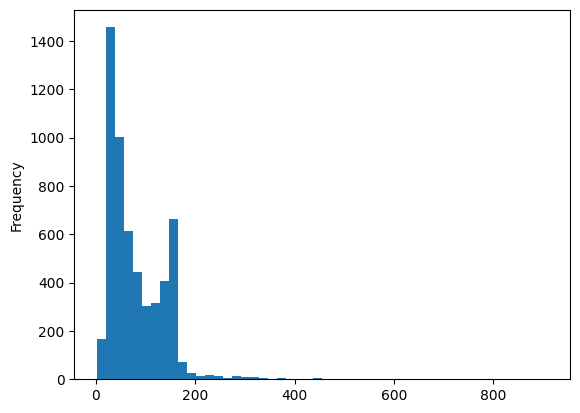

In [ ]:
# understanding the distribution of the text column
data['text_len'].plot(bins=50, kind='hist')
plt.show()

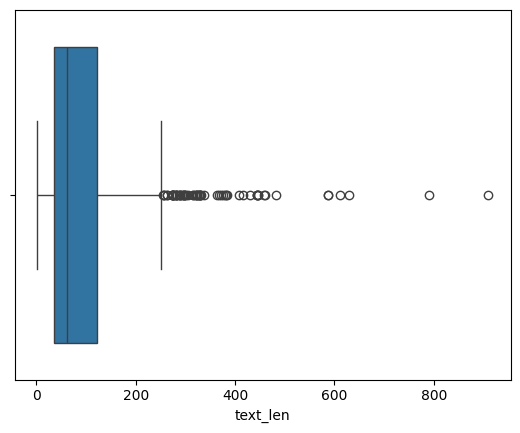

In [ ]:
sns.boxplot(data['text_len'], orient='h')
plt.show()

In [ ]:
# statistical summary
data['text_len'].describe()

,text_len
count,5574.000000
mean,80.444923
std,59.841828
min,2.000000
25%,36.000000
50%,61.000000
75%,122.000000
max,910.000000


In [ ]:
# printing the shortest message and the count
data[data['text_len'] == data['text_len'].min()]['text'].value_counts()

,count
text,
Ok,4
:),1


In [ ]:
# printing the shortest message and the count
data[data['text_len'] == data['text_len'].max()]['text'].value_counts()

,count
text,
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..,1


In [ ]:
# remove stopwords, punctuations

# list of stopwords
print(stopwords.words('english'))

# list of punctuations
print(string.punctuation)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/sms_spam.csv')

# encoding the target label
data['type'] = data['type'].map({'ham': 0, 'spam': 1})

# Drop rows where 'type' might have become NaN due to unmapped values
data.dropna(subset=['type'], inplace=True)

# data sample
data.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#function to remove stopwords and punctuations.
def text_preprocessing (message):
    clean_text = ''.join([char for char in message if char not in string.punctuation])
    return ''.join([word for word in clean_text.split() if word.lower() not in stopwords.words('english')])

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['type'], test_size=0.2, random_state=42)

In [ ]:
# vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf=vectorizer.fit_transform(x_train)
x_test_tfidf=vectorizer.transform(x_test)

In [ ]:
# Naive Bayes model
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)
print('Training Score:', round(model.score(x_train_tfidf, y_train)*100, 2), '%')

Training Score: 98.23 %



Classification Report:

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



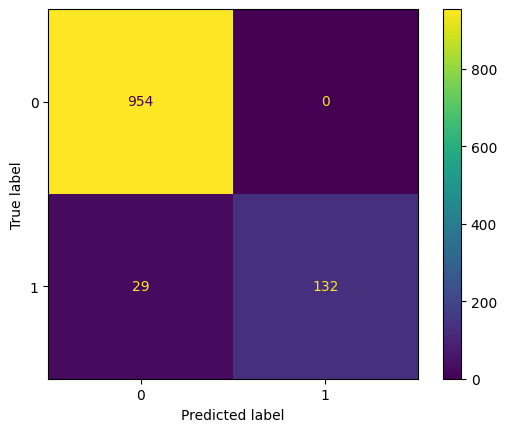

In [ ]:
# model testing
y_pred = model.predict(x_test_tfidf)
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n\n', report)

In [ ]:
# function to predict a incoming message
def predict_message():
    message = str(input('Enter a message to predct ham/spam: '))
    input_tfidf = vectorizer.transform([message])
    prediction = model.predict(input_tfidf)
    return 'The message is Spam.' if prediction[0] == 1 else 'The message is Ham.'

In [ ]:
# input message
predict_message()